In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [2]:
class_names=['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','keyboard','lamp','lawn_mower','leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm']

In [3]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [4]:
# X_data: scaling
X_train = X_train/255.
X_test = X_test/255.

# y_data: one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [6]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [7]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model_path = 'best-cifar100.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [9]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100,
    batch_size=64, callbacks=[mc,es]
)

Epoch 1/100
623/625 [============================>.] - ETA: 0s - loss: 4.4178 - accuracy: 0.0318
Epoch 1: val_loss improved from inf to 4.18833, saving model to best-cifar100.h5
625/625 [==============================] - 12s 13ms/step - loss: 4.4174 - accuracy: 0.0318 - val_loss: 4.1883 - val_accuracy: 0.0656
Epoch 2/100
625/625 [==============================] - ETA: 0s - loss: 4.1039 - accuracy: 0.0734
Epoch 2: val_loss improved from 4.18833 to 3.89644, saving model to best-cifar100.h5
625/625 [==============================] - 6s 9ms/step - loss: 4.1039 - accuracy: 0.0734 - val_loss: 3.8964 - val_accuracy: 0.1189
Epoch 3/100
624/625 [============================>.] - ETA: 0s - loss: 3.8593 - accuracy: 0.1118
Epoch 3: val_loss improved from 3.89644 to 3.66112, saving model to best-cifar100.h5
625/625 [==============================] - 5s 8ms/step - loss: 3.8592 - accuracy: 0.1120 - val_loss: 3.6611 - val_accuracy: 0.1594
Epoch 4/100
621/625 [============================>.] - ETA: 0s 

In [10]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.1065 - accuracy: 0.4592


[2.1065168380737305, 0.459199994802475]

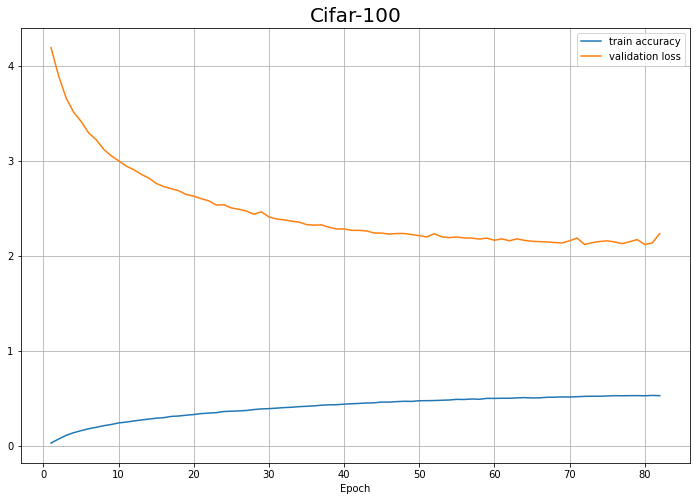

In [11]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize=(12,8))
plt.title('Cifar-100', size=20)
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()

In [25]:
new_model = Sequential([
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [26]:
new_model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
new_model_path = 'new_best_cifar100.h5'
new_mc = ModelCheckpoint(new_model_path, save_best_only=True, verbose=1)
new_es = EarlyStopping(patience=10)
new_hist = new_model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100,
    batch_size=64, callbacks=[mc,es]
)

Epoch 1/100
500/500 [==============================] - ETA: 0s - loss: 4.5472 - accuracy: 0.0206
Epoch 1: val_loss did not improve from 2.11939
500/500 [==============================] - 4s 7ms/step - loss: 4.5472 - accuracy: 0.0206 - val_loss: 4.3906 - val_accuracy: 0.0535
Epoch 2/100
497/500 [============================>.] - ETA: 0s - loss: 4.2819 - accuracy: 0.0478
Epoch 2: val_loss did not improve from 2.11939
500/500 [==============================] - 4s 7ms/step - loss: 4.2815 - accuracy: 0.0478 - val_loss: 4.1470 - val_accuracy: 0.0833
Epoch 3/100
497/500 [============================>.] - ETA: 0s - loss: 4.0864 - accuracy: 0.0760
Epoch 3: val_loss did not improve from 2.11939
500/500 [==============================] - 3s 6ms/step - loss: 4.0852 - accuracy: 0.0761 - val_loss: 3.9333 - val_accuracy: 0.1235
Epoch 4/100
495/500 [============================>.] - ETA: 0s - loss: 3.9219 - accuracy: 0.1015
Epoch 4: val_loss did not improve from 2.11939
500/500 [======================

In [28]:
best_model = load_model(new_model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.0839 - accuracy: 0.4730


[2.083904266357422, 0.4729999899864197]

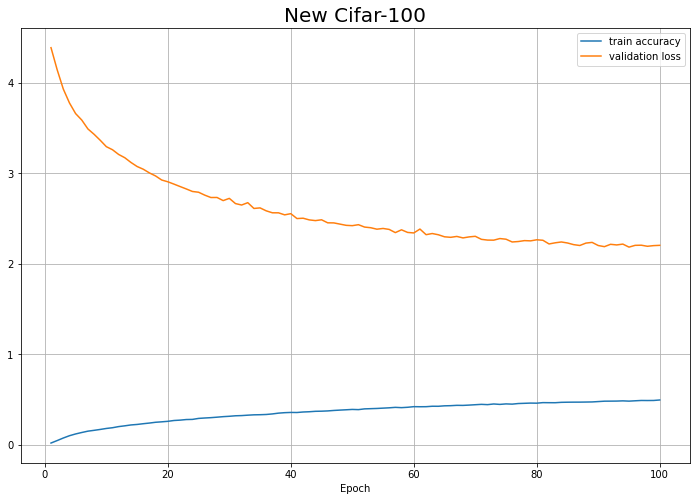

In [29]:
new_y_acc = new_hist.history['accuracy']
new_y_vloss = new_hist.history['val_loss']
new_xs = np.arange(1, len(new_y_acc)+1)

plt.figure(figsize=(12,8))
plt.title('New Cifar-100', size=20)
plt.plot(new_xs, new_y_acc, label='train accuracy')
plt.plot(new_xs, new_y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()

- 데이터 부풀리기

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2, random_state=seed
)

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5,
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [32]:
model_path2 = 'best_cifar100_gen.h5'
mc2 = ModelCheckpoint(model_path2, save_best_only=True, verbose=1)
es2= EarlyStopping(patience=10)

In [33]:
hist2 = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_valid, Y_valid), epochs=100,
    callbacks=[mc2,es2]
)

Epoch 1/100
 998/1000 [============================>.] - ETA: 0s - loss: 2.6261 - accuracy: 0.3460
Epoch 1: val_loss improved from inf to 2.06432, saving model to best_cifar100_gen.h5
1000/1000 [==============================] - 20s 20ms/step - loss: 2.6258 - accuracy: 0.3461 - val_loss: 2.0643 - val_accuracy: 0.4714
Epoch 2/100
 998/1000 [============================>.] - ETA: 0s - loss: 2.6165 - accuracy: 0.3435
Epoch 2: val_loss did not improve from 2.06432
1000/1000 [==============================] - 19s 19ms/step - loss: 2.6165 - accuracy: 0.3433 - val_loss: 2.0743 - val_accuracy: 0.4609
Epoch 3/100
 998/1000 [============================>.] - ETA: 0s - loss: 2.6020 - accuracy: 0.3495
Epoch 3: val_loss did not improve from 2.06432
1000/1000 [==============================] - 20s 20ms/step - loss: 2.6019 - accuracy: 0.3495 - val_loss: 2.1006 - val_accuracy: 0.4667
Epoch 4/100
 998/1000 [============================>.] - ETA: 0s - loss: 2.6051 - accuracy: 0.3484
Epoch 4: val_loss im

In [34]:
best_model2 = load_model(model_path2)
best_model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.2927 - accuracy: 0.4100


[2.2926714420318604, 0.4099999964237213]

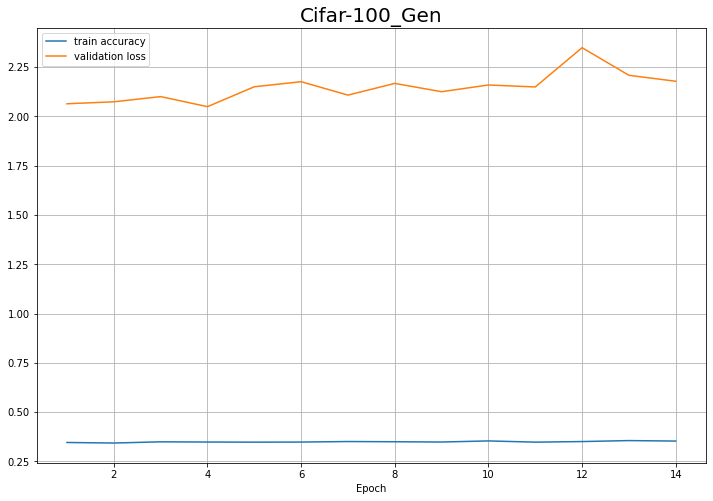

In [35]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

plt.figure(figsize=(12,8))
plt.title('Cifar-100_Gen', size=20)
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()

In [36]:
new_model_path2 = 'new_best_cifar100_gen.h5'
new_mc2 = ModelCheckpoint(new_model_path2, save_best_only=True, verbose=1)
new_es2 = EarlyStopping(patience=10)

In [37]:
new_hist2 = new_model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_valid, Y_valid), epochs=100,
    callbacks=[new_mc2,new_es2]
)

Epoch 1/100
 999/1000 [============================>.] - ETA: 0s - loss: 2.7116 - accuracy: 0.3313
Epoch 1: val_loss improved from inf to 1.86081, saving model to new_best_cifar100_gen.h5
1000/1000 [==============================] - 20s 19ms/step - loss: 2.7115 - accuracy: 0.3313 - val_loss: 1.8608 - val_accuracy: 0.5386
Epoch 2/100
 998/1000 [============================>.] - ETA: 0s - loss: 2.6799 - accuracy: 0.3320
Epoch 2: val_loss did not improve from 1.86081
1000/1000 [==============================] - 19s 19ms/step - loss: 2.6795 - accuracy: 0.3322 - val_loss: 1.8825 - val_accuracy: 0.5245
Epoch 3/100
1000/1000 [==============================] - ETA: 0s - loss: 2.6713 - accuracy: 0.3372
Epoch 3: val_loss did not improve from 1.86081
1000/1000 [==============================] - 19s 19ms/step - loss: 2.6713 - accuracy: 0.3372 - val_loss: 1.9387 - val_accuracy: 0.5082
Epoch 4/100
 998/1000 [============================>.] - ETA: 0s - loss: 2.6737 - accuracy: 0.3339
Epoch 4: val_los

In [38]:
new_best_model2 = load_model(new_model_path2)
new_best_model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3276 - accuracy: 0.4130


[2.3276400566101074, 0.4129999876022339]

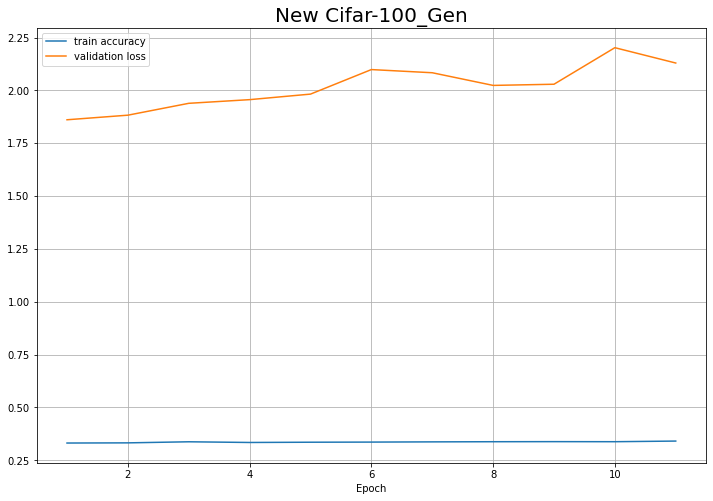

In [39]:
new_y_acc2 = new_hist2.history['accuracy']
new_y_vloss2 = new_hist2.history['val_loss']
new_xs2 = np.arange(1, len(new_y_acc2)+1)

plt.figure(figsize=(12,8))
plt.title('New Cifar-100_Gen', size=20)
plt.plot(new_xs2, new_y_acc2, label='train accuracy')
plt.plot(new_xs2, new_y_vloss2, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()